In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2
import pandas as pd

In [3]:
a = [1,2,3,4,5,6,7,8,9,10]
b = [11,12,13,14,15,16,17,18,19,20]

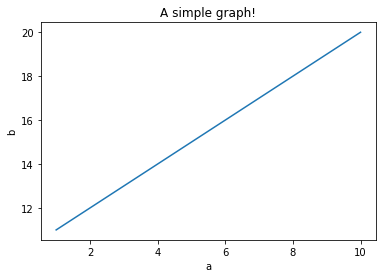

In [7]:
plt.xlabel('a')
plt.ylabel('b')
plt.title('A simple graph!')
plt.plot(a, b)
plt.show()

In [14]:
# Generate 250 values
data_hist = np.random.normal(170, 10, 250)
# data_hist.shape
print(data_hist)

(250,)

(array([ 1.,  0.,  1.,  2.,  5.,  4.,  4.,  4.,  9., 17.,  8., 20.,  6.,
        16., 17., 16., 22., 17., 16., 11., 11., 10.,  6.,  9.,  6.,  5.,
         3.,  0.,  2.,  2.]),
 array([141.9897713 , 143.80481991, 145.61986853, 147.43491714,
        149.24996575, 151.06501436, 152.88006298, 154.69511159,
        156.5101602 , 158.32520881, 160.14025743, 161.95530604,
        163.77035465, 165.58540326, 167.40045188, 169.21550049,
        171.0305491 , 172.84559772, 174.66064633, 176.47569494,
        178.29074355, 180.10579217, 181.92084078, 183.73588939,
        185.550938  , 187.36598662, 189.18103523, 190.99608384,
        192.81113245, 194.62618107, 196.44122968]),
 <BarContainer object of 30 artists>)

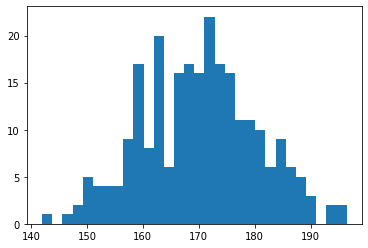

In [16]:
plt.hist(data_hist, bins=30)

In [22]:
x = np.array(['A', 'B', 'C', 'D', 'E'])
y = np.array([3, 5, 10, 6, 9])

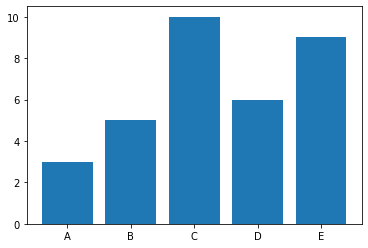

In [23]:
plt.bar(x, y)
plt.show()

<BarContainer object of 2 artists>

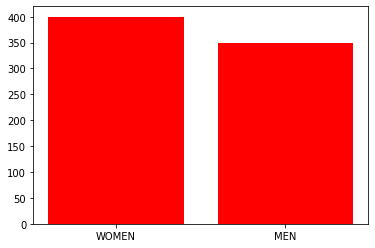

In [25]:
x = ["WOMEN", "MEN"]
y = [400, 350]
plt.bar(x, y, color = "red")



# Reading data

In [7]:
# Lets iterate list of encoding options to find which encoding used by the data

encoding_list = ['ascii', 'big5', 'big5hkscs', 'cp037', 'cp273', 'cp424', 'cp437', 'cp500', 'cp720', 'cp737'
                 , 'cp775', 'cp850', 'cp852', 'cp855', 'cp856', 'cp857', 'cp858', 'cp860', 'cp861', 'cp862'
                 , 'cp863', 'cp864', 'cp865', 'cp866', 'cp869', 'cp874', 'cp875', 'cp932', 'cp949', 'cp950'
                 , 'cp1006', 'cp1026', 'cp1125', 'cp1140', 'cp1250', 'cp1251', 'cp1252', 'cp1253', 'cp1254'
                 , 'cp1255', 'cp1256', 'cp1257', 'cp1258', 'euc_jp', 'euc_jis_2004', 'euc_jisx0213', 'euc_kr'
                 , 'gb2312', 'gbk', 'gb18030', 'hz', 'iso2022_jp', 'iso2022_jp_1', 'iso2022_jp_2'
                 , 'iso2022_jp_2004', 'iso2022_jp_3', 'iso2022_jp_ext', 'iso2022_kr', 'latin_1', 'iso8859_2'
                 , 'iso8859_3', 'iso8859_4', 'iso8859_5', 'iso8859_6', 'iso8859_7', 'iso8859_8', 'iso8859_9'
                 , 'iso8859_10', 'iso8859_11', 'iso8859_13', 'iso8859_14', 'iso8859_15', 'iso8859_16', 'johab'
                 , 'koi8_r', 'koi8_t', 'koi8_u', 'kz1048', 'mac_cyrillic', 'mac_greek', 'mac_iceland', 'mac_latin2'
                 , 'mac_roman', 'mac_turkish', 'ptcp154', 'shift_jis', 'shift_jis_2004', 'shift_jisx0213', 'utf_32'
                 , 'utf_32_be', 'utf_32_le', 'utf_16', 'utf_16_be', 'utf_16_le', 'utf_7', 'utf_8', 'utf_8_sig']

for encoding in encoding_list:
    worked = True
    try:
        df = pd.read_csv('policefatalities.csv', encoding=encoding, nrows=5)
    except:
        worked = False
    if worked:
        print(encoding)
        print('Data :\n', df.head())

In [142]:
police_data = pd.read_csv('policefatalities.csv', encoding="cp720")
police_data.head()

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee
0,133,Karen O. Chin,44.0,Female,Asian,5/4/2000,Alameda,CA,Shot,NaN,False,False
1,169,Chyraphone Komvongsa,26.0,Male,Asian,6/2/2000,Fresno,CA,Shot,NaN,False,False
2,257,Ming Chinh Ly,36.0,Male,Asian,8/13/2000,Rosemead,CA,Shot,Gun,False,False
3,483,Kinh Quoc Dao,29.0,Male,Asian,2/9/2001,Valley Glen,CA,Shot,Gun,False,False
4,655,Vanpaseuth Phaisouphanh,25.0,Male,Asian,6/10/2001,Riverside,CA,Shot,Knife,False,False


In [153]:
police_data['Race']

0        Asian
1        Asian
2        Asian
3        Asian
4        Asian
         ...  
12486      NaN
12487      NaN
12488      NaN
12489      NaN
12490      NaN
Name: Race, Length: 12491, dtype: object

In [147]:
# Lets get an idea of the races
races = set(police_data['Race'].map(lambda x: filter_out_nan(x)))
print(races)

# Lets define a filter function to clean NaN
def filter_out_nan(race):
    if str(race).lower() == 'nan':
        return 'Other'
    else:
        return race
    
# Lets apply out filter function    
police_data['Race'] = police_data['Race'].apply(removeNull)
    
#Lets use set to get the races
# races = set(police_data['Race'].map(lambda x: filter_out_nan(x)))
# races
# numbers = np.array([1000, 5000, 10000])
# plt.bar(race, numbers)

{'White', 'Other', 'Black', 'Hispanic', 'Asian', 'Native'}


In [148]:
# Lets remove rows with NaN
# police_data.dropna()
# new_police_data = police_data.dropna(subset=['Race', 'Name', 'Armed'])
# new_police_data

In [155]:
# Lets get info on columns' total count of NaN values
police_data.isnull().sum()
# police_data.isna().sum()

UID                0
Name               0
Age                0
Gender             0
Race               0
Date               0
City               0
State              0
Manner_of_death    0
Armed              0
Mental_illness     0
Flee               0
dtype: int64

In [154]:
# replace NaN with '' in column Race
police_data['Race'] = police_data['Race'].replace(np.nan, 'Other')
# replace NaN with 'Gun' in column Armed
police_data['Armed'] = police_data['Armed'].replace(np.nan, 'Gun')
police_data['Gender'] = police_data['Gender'].replace(np.nan, 'Male')
police_data['City'] = police_data['City'].replace(np.nan, 'City')
police_data['Age'] = police_data['Age'].replace(np.nan, police_data["Age"].mean())

police_data.head()

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee
0,133,Karen O. Chin,44.0,Female,Asian,5/4/2000,Alameda,CA,Shot,Gun,False,False
1,169,Chyraphone Komvongsa,26.0,Male,Asian,6/2/2000,Fresno,CA,Shot,Gun,False,False
2,257,Ming Chinh Ly,36.0,Male,Asian,8/13/2000,Rosemead,CA,Shot,Gun,False,False
3,483,Kinh Quoc Dao,29.0,Male,Asian,2/9/2001,Valley Glen,CA,Shot,Gun,False,False
4,655,Vanpaseuth Phaisouphanh,25.0,Male,Asian,6/10/2001,Riverside,CA,Shot,Knife,False,False


# Get Mean and Mode of a column

In [163]:
# Get mode
print(police_data.mode()['Armed'][0])
print(police_data.mode()['State'][0])
print(police_data.mode()['Race'][0])
print(police_data.mode()['Gender'][0])
# Get mean average
print(police_data["Age"].mean())
print(police_data["Race"])

Gun
CA
Other
Male
35.269538260727685
0        Asian
1        Asian
2        Asian
3        Asian
4        Asian
         ...  
12486    Other
12487    Other
12488    Other
12489    Other
12490    Other
Name: Race, Length: 12491, dtype: object


(array([ 173.,    0.,    0.,    0., 2536.,    0.,    0.,    0., 1784.,
           0.,    0.,    0., 4013.,    0.,    0.,    0.,  130.,    0.,
           0., 3855.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <BarContainer object of 20 artists>)

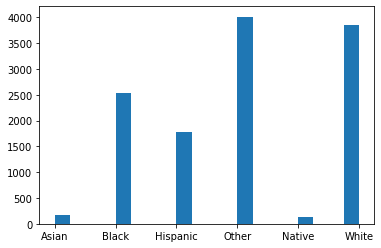

In [161]:
plt.hist(police_data['Race'], bins=20)

In [162]:
police_data.tail()

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee
12486,12388,Name withheld by police,35.269538,Male,Other,12/9/2008,Sacramento,CA,Other,Gun,False,False
12487,12429,Gene Lovell Ford,48.000000,Male,Other,8/6/2008,Sacramento,CA,Other,Gun,True,False
12488,12430,Jose Vega,38.000000,Male,Other,8/6/2008,Visalia,CA,Other,Gun,True,False
12489,12636,Humberto Torres,41.000000,Male,Other,3/21/2009,Delano,CA,Other,Gun,False,False
12490,12861,Name withheld by police,39.000000,Male,Other,1/15/2010,Los Angeles,CA,Other,Gun,False,False


,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee
0,133,Karen O. Chin,44.0,Female,None,5/4/2000,Alameda,CA,Shot,Gun,False,False
1,169,Chyraphone Komvongsa,26.0,Male,None,6/2/2000,Fresno,CA,Shot,Gun,False,False
2,257,Ming Chinh Ly,36.0,Male,None,8/13/2000,Rosemead,CA,Shot,Gun,False,False
3,483,Kinh Quoc Dao,29.0,Male,None,2/9/2001,Valley Glen,CA,Shot,Gun,False,False
4,655,Vanpaseuth Phaisouphanh,25.0,Male,None,6/10/2001,Riverside,CA,Shot,Knife,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
95,9355,Ja Ma Lo Day,21.0,Male,None,7/13/2014,San Diego,CA,Shot,Knife,True,False
96,9433,Yee Vang,20.0,Male,None,8/3/2014,Saint Paul,MN,Shot,Gun,False,False
97,9608,William Smith,33.0,Male,None,9/19/2014,Las Cruces,NM,Shot,Gun,False,False
98,9712,Phia Vang,25.0,Male,None,10/23/2014,Jean,NV,Shot,Gun,True,False
